In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
student_df = pd.read_csv('data/stud.csv')

In [4]:
student_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
student_df.shape

(1000, 8)

3. Data checks 
- Missing values
- Duplicates
- Data types
- Unique values
- Statistics
- Different categories present in each column

In [7]:
student_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are 0 missing values

In [8]:
student_df.duplicated().sum()

0

There are 0 duplicates

In [10]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
print(f"Columns with non numeric data : {[feature for feature in student_df.columns if student_df[feature].dtype == 'O']}")
print(f"Columns with numeric data : {[feature for feature in student_df.columns if student_df[feature].dtype != 'O']}")

Columns with non numeric data : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Columns with numeric data : ['math_score', 'reading_score', 'writing_score']


In [13]:
student_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
student_df['total_score'] = student_df['math_score'] + student_df['reading_score'] + student_df['writing_score']
student_df['average_score'] = student_df['total_score'] / 3
student_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


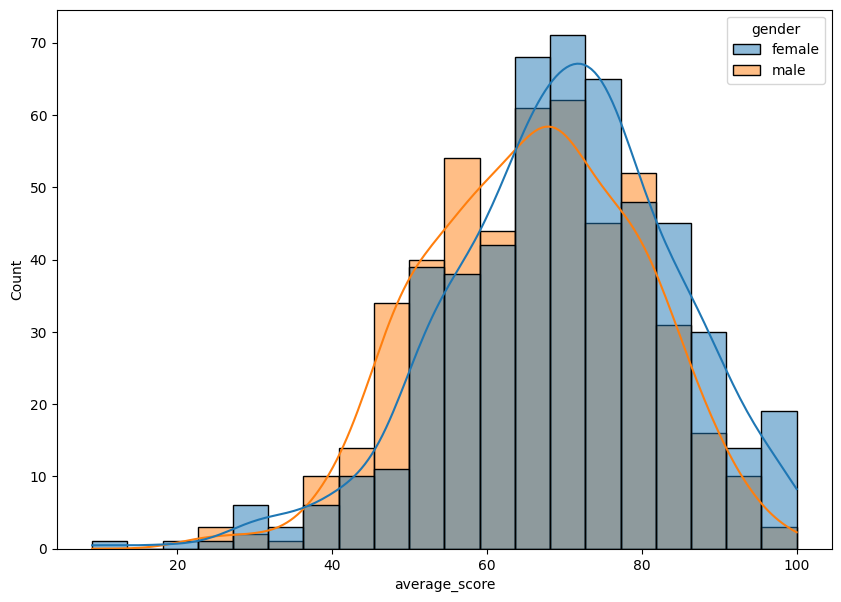

In [21]:
plt.figure(figsize = (10, 7))
sns.histplot(data = student_df, x = 'average_score', bins = 20, kde = True, hue = 'gender')
plt.show()

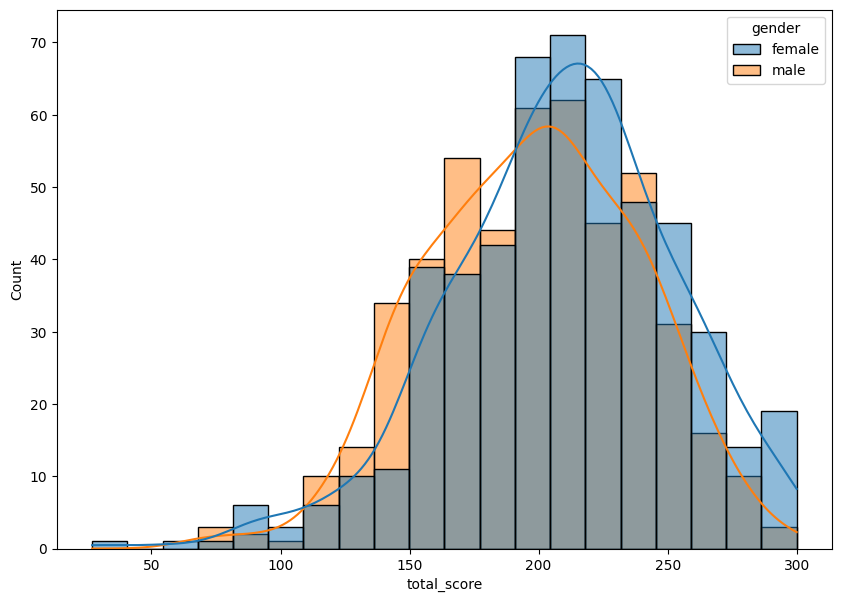

In [22]:
plt.figure(figsize = (10, 7))
sns.histplot(data = student_df, x = 'total_score', bins = 20, kde = True, hue = 'gender')
plt.show()

We can see that females tend to perform better than males.

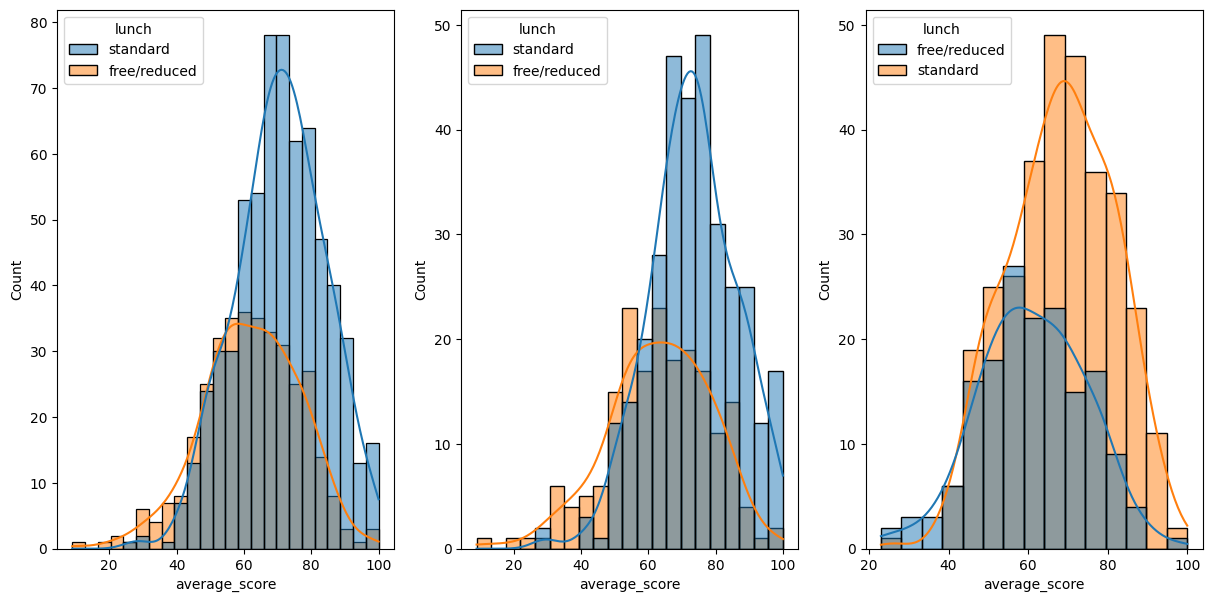

In [25]:
plt.subplots(1, 3, figsize = (20, 7))
plt.subplot(141)
sns.histplot(data = student_df, x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = student_df[student_df['gender'] == 'female'],x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = student_df[student_df['gender'] == 'male'],x = 'average_score', kde = True, hue = 'lunch')
plt.show()

As we can see, students having 'standard lunch' tend to perform better than students having 'free/reduced lunch' 

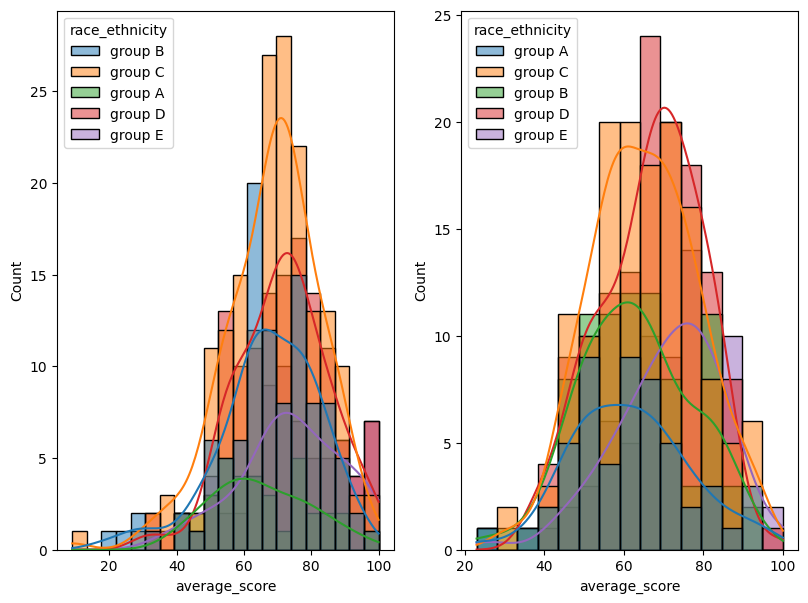

In [29]:
plt.subplots(1, 3, figsize = (20, 7))
#plt.subplot(141)
#sns.histplot(data = student_df, x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data = student_df[student_df['gender'] == 'female'],x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data = student_df[student_df['gender'] == 'male'],x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.show()

We can see among females, group C has perfomed the `best` while group A has perfomed the `worst`
and among males, group D has performed the `best` while group B has perfomed the `worst`

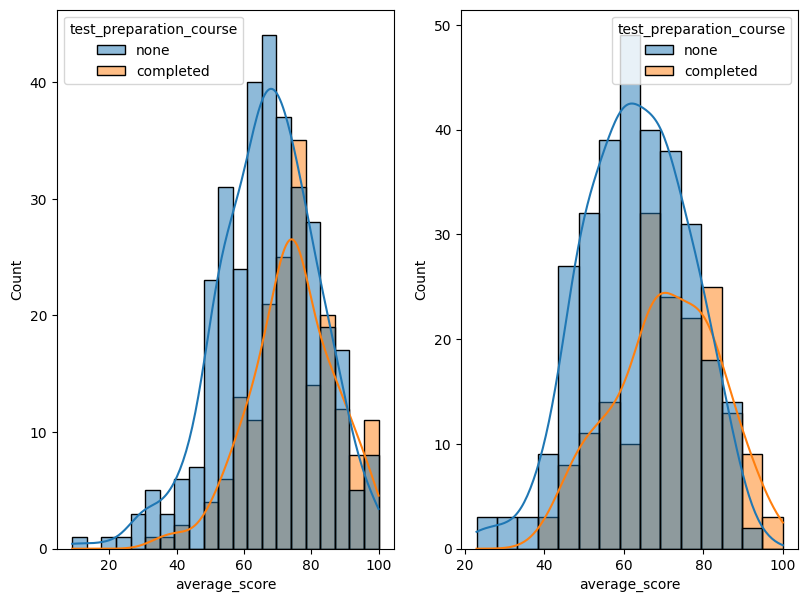

In [32]:
plt.subplots(1, 3, figsize = (20, 7))
#plt.subplot(141)
#sns.histplot(data = student_df, x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data = student_df[student_df['gender'] == 'female'],x = 'average_score', kde = True, hue = 'test_preparation_course')
plt.subplot(143)
sns.histplot(data = student_df[student_df['gender'] == 'male'],x = 'average_score', kde = True, hue = 'test_preparation_course')
plt.show()